0.9
0.8536902667936572
0.8055932768110821
0.7570491411989236
0.709391662246948
0.6637997485771714
0.6211918296665755
0.5821792859397754
0.5470748448594239
0.5159387578273407
0.4886422533644539
0.4649316584427638
0.444483245862774
0.42694493124795213
0.41196497820864647
0.39920987125516855
0.3883740877066916
0.37918429431345546
0.3713999828114488
0.3648120085110677
0.3592400260187514
0.354529459135696
0.35054839025856865
0.34718458657437257
0.3443427731291817
0.34194219733017933
0.3399144912953764
0.33820181766980734
0.3367552743703531
0.3355335298613011


<function matplotlib.pyplot.show(close=None, block=None)>

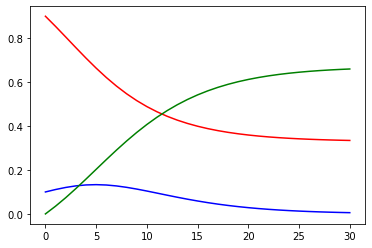

In [15]:
#trying 4th order Runge-Kutta method for SIR model
#author: Elaine Gorom

#create function for susceptible ode
def dsdt(t,s,i):
    return(-beta*s*i)

#create function for infected ode
def didt(t,s,i):
    return(beta*s*i-gamma*i)

#omitting function for recovered ode since it's not necessary to solve this system of odes

#creating main function for 4th order Runge-Kutta for SIR model
def RK4SIR(n,beta, gamma,s0,i0,r0,dt):
    #initialize the arrays for solutions
    S=[s0]+[0]*n
    I=[i0]+[0]*n
    R=[r0]+[0]*n
   

    #calculate each step using RK4
    for i in range(0,n):
        Si=S[i]
        Ii=I[i]
        print(Si)

        sk1=dsdt(i,Si,Ii)
        ik1=didt(i,Si,Ii)
        

        sk2=dsdt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)
        ik2=didt(i+dt/2,Si+dt/2*sk1,Ii+dt/2*ik1)

        sk3=dsdt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)
        ik3=didt(i+dt/2,Si+dt/2*sk2,Ii+dt/2*ik2)

        sk4=dsdt(i+dt,Si+dt*sk3,Ii+dt*ik3)
        ik4=didt(i+dt,Si+dt*sk3,Ii+dt*ik3)

        S[i+1]=Si+dt/6*(sk1+2*sk2+2*sk3+sk4)
        I[i+1]=Ii+dt/6*(ik1+2*ik2+2*ik3+ik4)

    #caculate recovered array
    for i in range(len(R)):
        R[i]=1-I[i]-S[i]

    return S,I,R

n=30
beta=0.5
gamma=1/3
s0=.9
i0=.1
r0=0
dt=1
s,i,r=RK4SIR(n,beta,gamma,s0,i0,r0,dt)

import numpy as np
import math
import matplotlib.pyplot as plt

t=list(range(0,n+1))
plt.figure
plt.plot(t,s,'r')
plt.plot(t,i,'b')
plt.plot(t,r,'g')
plt.show


    
